# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [120]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/shuran/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [121]:
# Read your api key environment variable
from newsapi import NewsApiClient
load_dotenv("example.env")
api_key = os.getenv("NEWS_API_KEY")

In [122]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [129]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q='"bitcoin"',
    language="en",
    page_size=100,
    sort_by="relevancy",
    page=1
)

# Print total articles
print(f"Total articles about Bitcoin : {bitcoin_headlines['totalResults']}")

# Show sample article
bitcoin_headlines["articles"][0]

Total articles about Bitcoin : 3780


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Mariella Moon',
 'title': 'FBI and CISA warn against surge in voice phishing campaigns',
 'description': 'Authorities saw an uptick in voice phishing (or “vishing”) campaigns after the pandemic forced companies to implement work-from-home arrangements. That’s what the Federal Bureau of Investigation (FBI) and the Cybersecurity and Infrastructure Security Agency (…',
 'url': 'https://www.engadget.com/fbi-cisa-issue-voice-phishing-campaign-advisory-121936127.html',
 'urlToImage': 'https://o.aolcdn.com/images/dims?resize=1200%2C630&crop=1200%2C630%2C0%2C0&quality=95&image_uri=https%3A%2F%2Fs.yimg.com%2Fos%2Fcreatr-images%2F2019-08%2F963d0510-bf49-11e9-beff-3f5e5758e121&client=amp-blogside-v2&signature=79d749ba8d928e91cc070a6e5de85e6011dad5c2',
 'publishedAt': '2020-08-23T12:19:36Z',
 'content': '“The COVID-19 pandemic has resulted in a mass shift to working from home, resulting in increased use of corporate VPN and elimination

In [130]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q='"ethereum"',
    language="en",
    page_size=100,
    sort_by="relevancy",
    page=1
)

# Print total articles
print(f"Total articles about Ethereum : {ethereum_headlines['totalResults']}")

# Show sample article
ethereum_headlines["articles"][1]

Total articles about Ethereum : 1332


{'source': {'id': 'mashable', 'name': 'Mashable'},
 'author': 'Joseph Green',
 'title': 'Learn how to invest in stocks and cryptocurrency for under £30',
 'description': 'TL;DR: The Complete Stock and Cryptocurrency Investment Toolkit Bundle is on sale for £29.46 as of Sept. 7, saving you 97% on list price.\n\nThe world of finance has always been complicated, and now there are alternatives like cryptocurrency to make it even mor…',
 'url': 'https://mashable.com/uk/shopping/sept-7-stocks-and-cryptocurrency-course/',
 'urlToImage': 'https://mondrian.mashable.com/2020%252F09%252F07%252Fa2%252F5b05e53e6be1466cad465a14a31d98dc.011cc.jpg%252F1200x630.jpg?signature=nXcor39oLNOQ8AjgFe8Tw5G1iLw=',
 'publishedAt': '2020-09-07T09:04:23Z',
 'content': 'TL;DR: The Complete Stock and Cryptocurrency Investment Toolkit Bundle is on sale for £29.46 as of Sept. 7, saving you 97% on list price.\r\nThe world of finance has always been complicated, and now th… [+2225 chars]'}

In [131]:
# Define a function to produce sentiment scores for a list of articles

def compute_sentiment_scores(articles):
    sentiments = []
    for article in articles:
        try:
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]

            sentiments.append({
                "text": text,
                "date": date,
                "compound": compound,
                "positive": pos,
                "negative": neg,
                "neutral": neu

            })

        except AttributeError:
            pass
    
    return sentiments
            

In [132]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = compute_sentiment_scores(bitcoin_headlines["articles"])
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

# Show top rows
bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2020-08-23,“The COVID-19 pandemic has resulted in a mass ...,0.2732,0.063,0.000,0.937
1,2020-08-07,In what appears to be a massive coordinated st...,-0.1280,0.000,0.046,0.954
2,2020-08-17,LONDON (Reuters) - Bitcoin jumped to its highe...,0.3818,0.069,0.000,0.931
3,2020-08-26,Our robot colleague Satoshi Nakaboto writes ab...,0.5070,0.090,0.000,0.910
4,2020-08-20,Our robot colleague Satoshi Nakaboto writes ab...,0.5070,0.090,0.000,0.910


In [133]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = compute_sentiment_scores(ethereum_headlines["articles"])
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

# Show top rows
ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2020-09-02,If you've interacted with cryptocurrencies in ...,0.7506,0.209,0.0,0.791
1,2020-09-07,TL;DR: The Complete Stock and Cryptocurrency I...,0.0000,0.000,0.0,1.000
2,2020-08-17,TL;DR: The Mega Blockchain Mastery Bundle is o...,0.0000,0.000,0.0,1.000
3,2020-08-26,LONDON (Reuters) - It sounds like a surefire b...,0.7579,0.181,0.0,0.819
4,2020-08-25,NEW YORK (Reuters) - Brooklyn-based technology...,0.0000,0.000,0.0,1.000


In [134]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,97.000000,97.000000,97.000000,97.000000
mean,0.168689,0.083629,0.053423,0.862979
std,0.430017,0.057994,0.079030,0.088862
min,-0.988900,0.000000,0.000000,0.455000
25%,0.000000,0.029000,0.000000,0.802000
50%,0.271400,0.090000,0.000000,0.879000
75%,0.507000,0.138000,0.085000,0.910000
max,0.796400,0.210000,0.545000,1.000000


In [135]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,93.000000,93.000000,93.000000,93.000000
mean,0.111611,0.069688,0.043667,0.886634
std,0.418399,0.069772,0.063871,0.086304
min,-0.910000,0.000000,0.000000,0.689000
25%,-0.051600,0.000000,0.000000,0.831000
50%,0.000000,0.072000,0.000000,0.902000
75%,0.440400,0.103000,0.074000,0.943000
max,0.851900,0.311000,0.309000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest mean positive score. While Ethereum had the mean positive score 0.069688, Bitcoin had the mean positive score 0.083629. 

Q: Which coin had the highest compound score?

A: Ethereum coin had the highest compound score. Bitcoin had the max compound score 0.7964, while Ethereum had the max compound score 0.8519.

Q. Which coin had the highest positive score?

A: Ethereum coin had the highest positive score. Bitcoin had the max positive score 0.21, while Ethereum had the max positive score 0.311.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [136]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [137]:
# Expand the default stopwords list if necessary
sw = set(stopwords.words('english'))

In [138]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    re_text = regex.sub('', text)
    # Create a list of the words
    tokens = word_tokenize(re_text)
    # Convert the words to lowercase
    tokens = [token.lower() for token in tokens]
    # Remove the stop words
    tokens = [token for token in tokens if token not in sw]
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

In [139]:
# Create a new tokens column for Bitcoin
bitcoin_tokens = []
for article in bitcoin_df["text"]:
    bitcoin_tokens.append(tokenizer(article))

bitcoin_df["tokens"] = bitcoin_tokens

# Show top rows
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-08-23,“The COVID-19 pandemic has resulted in a mass ...,0.2732,0.063,0.000,0.937,"[covid, pandemic, resulted, mass, shift, worki..."
1,2020-08-07,In what appears to be a massive coordinated st...,-0.1280,0.000,0.046,0.954,"[appears, massive, coordinated, strike, reddit..."
2,2020-08-17,LONDON (Reuters) - Bitcoin jumped to its highe...,0.3818,0.069,0.000,0.931,"[london, reuters, bitcoin, jumped, highest, ye..."
3,2020-08-26,Our robot colleague Satoshi Nakaboto writes ab...,0.5070,0.090,0.000,0.910,"[robot, colleague, satoshi, nakaboto, writes, ..."
4,2020-08-20,Our robot colleague Satoshi Nakaboto writes ab...,0.5070,0.090,0.000,0.910,"[robot, colleague, satoshi, nakaboto, writes, ..."


In [140]:
# Create a new tokens column for Ethereum
ethereum_tokens = []
for article in ethereum_df["text"]:
    ethereum_tokens.append(tokenizer(article))

ethereum_df["tokens"] = ethereum_tokens

# Show top rows
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-09-02,If you've interacted with cryptocurrencies in ...,0.7506,0.209,0.0,0.791,"[youve, interacted, cryptocurrencies, past, co..."
1,2020-09-07,TL;DR: The Complete Stock and Cryptocurrency I...,0.0000,0.000,0.0,1.000,"[tldr, complete, stock, cryptocurrency, invest..."
2,2020-08-17,TL;DR: The Mega Blockchain Mastery Bundle is o...,0.0000,0.000,0.0,1.000,"[tldr, mega, blockchain, mastery, bundle, sale..."
3,2020-08-26,LONDON (Reuters) - It sounds like a surefire b...,0.7579,0.181,0.0,0.819,"[london, reuters, sound, like, surefire, bet, ..."
4,2020-08-25,NEW YORK (Reuters) - Brooklyn-based technology...,0.0000,0.000,0.0,1.000,"[new, york, reuters, brooklynbased, technology..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [141]:
from collections import Counter
from nltk import ngrams

In [142]:
# Create a list that contains all tokens from 'tokens' column in bitcoin_df
bitcoin_tokens = []
for token_list in bitcoin_df["tokens"]:
    bitcoin_tokens.extend(token_list[:])
    
# Generate the Bitcoin N-grams where N=2 
bitcoin_bigram_counts = Counter(ngrams(bitcoin_tokens, n=2))

In [143]:
# Create a list that contains all tokens from 'tokens' column in ethereum_df
ethereum_tokens = []
for token_list in ethereum_df["tokens"]:
    ethereum_tokens.extend(token_list[:])
    
# Generate the Ethereum N-grams where N=2 
ethereum_bigram_counts = Counter(ngrams(ethereum_tokens, n=2))

In [144]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [145]:
# Get the top 10 words for Bitcoin
print(dict(token_count(bitcoin_bigram_counts, 10)))

{('satoshi', 'nakaboto'): 38, ('wireless', 'charging'): 32, ('char', 'robot'): 19, ('robot', 'colleague'): 19, ('colleague', 'satoshi'): 19, ('nakaboto', 'writes'): 19, ('writes', 'bitcoin'): 19, ('every', 'fucking'): 19, ('fucking', 'daywelcome'): 19, ('daywelcome', 'another'): 19}


In [146]:
# Get the top 10 words for Ethereum
print(dict(token_count(ethereum_bigram_counts, 10)))

{('char', 'ethereum'): 18, ('decentralized', 'finance'): 13, ('finance', 'defi'): 11, ('ethereum', 'classic'): 11, ('ethereum', 'miner'): 7, ('btc', 'trading'): 6, ('trading', 'around'): 6, ('ethereum', 'blockchain'): 6, ('char', 'price'): 4, ('price', 'bitcoin'): 4}


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [147]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

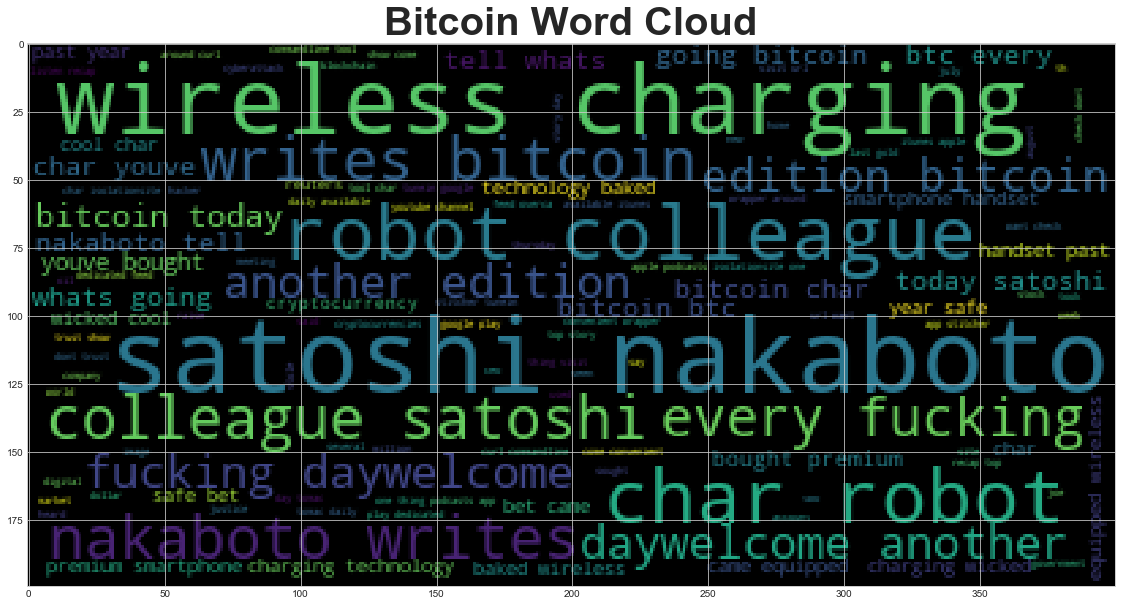

In [148]:
# Generate the Bitcoin word cloud
# Use all of tokens appeared in articles about Bitcoin to construct a word cloud
# In other words, use bitcoin_tokens defined in the above section

# Convert bitcoin_tokens to a big string
bitcoin_big_string = ' '.join(bitcoin_tokens)
bitcoin_wc = WordCloud().generate(bitcoin_big_string)
plt.title("Bitcoin Word Cloud", fontsize=40, fontweight="heavy")
plt.imshow(bitcoin_wc)

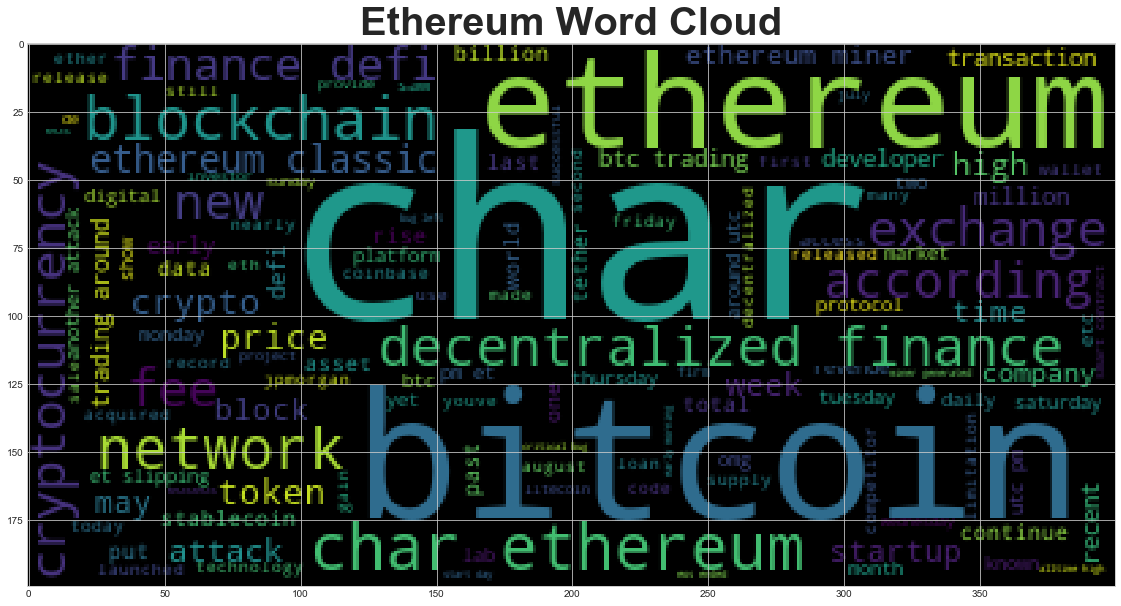

In [149]:
# Generate the Ethereum word cloud
# Use all of tokens appeared in articles about Ethereum to construct a word cloud
# In other words, use ethereum_tokens defined in the above section

# Convert bitcoin_tokens to a big string
ethereum_big_string = ' '.join(ethereum_tokens)
ethereum_wc = WordCloud().generate(ethereum_big_string)
plt.title("Ethereum Word Cloud", fontsize=40, fontweight="heavy")
plt.imshow(ethereum_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [150]:
import spacy
from spacy import displacy

In [151]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [152]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [153]:
# Concatenate all of the Bitcoin text together
sentence = ' '.join(bitcoin_df['text'])

In [154]:
# Run the NER processor on all of the text
doc = nlp(sentence)
# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [155]:
# Render the visualization
displacy.render(doc, style='ent')

In [159]:
# List all Entities
print([ent.text for ent in doc.ents])                                                  

['VPN', 'Reddit', 'over dozens', 'Friday', 'afternoon', 'pro-Donald Trump', 'LONDON', 'Reuters', 'Bitcoin', 'over a year', 'Monday', '2020', 'March', '4.4%', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'Satoshi Nakaboto', 'B

---

### Ethereum NER

In [162]:
# Concatenate all of the Ethereum text together
sentence = ' '.join(ethereum_df['text'])

In [163]:
# Run the NER processor on all of the text
doc = nlp(sentence)
# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [164]:
# Render the visualization
displacy.render(doc, style='ent')

In [165]:
# List all Entities
print([ent.text for ent in doc.ents]) 

['the past couple of years', 'The Complete Stock and Cryptocurrency Investment Toolkit Bundle', '29.46', 'Sept. 7', '97%', '29.81', 'August 17', '97%', 'LONDON', 'Reuters', 'about 20%', 'NEW YORK', 'Reuters', 'Brooklyn', 'ConsenSys', 'JPMorgan Chase &amp', 'Quorum', 'Tuesday', 'Bitcoin', 'BTC', 'two', 'UNUS SED LEO', 'LEO', 'Rick Wilking', 'ul><li', 'Michael Novogratz', 'Bloomberg', 'up to $3,000', 'The Galaxy Digital', 'Fed', 'Satoshi Nakaboto', 'Bitcoin', 'Bitcoin', 'Today', 'Satoshi Nakaboto', 'Bitcoin', 'first', 'second', 'one', 'bitcoin', 'more than 10%', '24-hour', 'twenty dollars', 'May', 'bitcoin', 'DeFi', 'DeFi', 'Ethereum', 'Mateusz Slodkowski/', 'Bitcoin', 'Bitcoin', 'as high as $12,086', 'Ethereum (ETH', 'Last week', 'YouTube', 'Bitcoin', 'Bitcoin', 'one-week', 'ul><li', 'Bitcoin', 'BTC', 'around $11,595', '20:0', 'Monday', '500', 'less than 1%', '3 p.m. EDT', 'Ho', 'DeFi', 'this weekend', 'ul><li', 'Bitcoin', 'BTC', 'around $11,579', '20:00', '4 p.m. ET', '2.4%', 'Silicon 

---